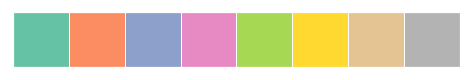

In [3]:
# Credits to From https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.models import load_model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
sns.set(font_scale=1.5)
p = sns.color_palette("Set2")
sns.palplot(p)
sns.set_palette(p)
cmap = plt.cm.get_cmap('Spectral')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 3})

In [4]:
SYN_PATH = './Synthetic/'
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [5]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model = load_model('mnist_classifier.h5')

In [64]:
data_vae = np.expand_dims(np.load(SYN_PATH + 'dcvae_1000.npy'), axis=4)
data_gan = np.load(SYN_PATH + 'dcgan_1000.npy')
data_aae = np.expand_dims(np.load(SYN_PATH + 'aae_1000_l8.npy'), axis=4)
data_mnist = np.expand_dims(np.load(SYN_PATH + 'mnist_1000.npy'), axis=4)

/Users/davidboyker/miniconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  """Entry point for launching an IPython kernel.
/Users/davidboyker/miniconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/davidboyker/miniconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  after removing the cwd from sys.path.


In [65]:
prediction_vae = np.around(model.predict(data_vae), 1)
prediction_gan = np.around(model.predict(data_gan), 1)
prediction_aae = np.around(model.predict(data_aae), 1)
prediction_mnist = np.around(model.predict(data_mnist), 1)
unique_vae, count_vae = np.unique(prediction_vae, return_counts=True)
unique_gan, count_gan = np.unique(prediction_gan, return_counts=True)
unique_aae, count_aae = np.unique(prediction_aae, return_counts=True)
unique_mnist, count_mnist = np.unique(prediction_mnist, return_counts=True)

In [71]:
prediction_rounded_vae = []
for element in np.around(model.predict(data_vae)):
    prediction_rounded_vae.append(np.argmax(element))
prediction_rounded_gan = []
for element in np.around(model.predict(data_gan)):
    prediction_rounded_gan.append(np.argmax(element))
prediction_rounded_aae = []
for element in np.around(model.predict(data_aae)):
    prediction_rounded_aae.append(np.argmax(element))
prediction_rounded_mnist = []
for element in np.around(model.predict(data_mnist)):
    prediction_rounded_mnist.append(np.argmax(element))

In [72]:
hist_vae = np.histogram(prediction_rounded_vae, bins=10)  
hist_gan = np.histogram(prediction_rounded_gan, bins=10)
hist_aae = np.histogram(prediction_rounded_aae, bins=10)
hist_mnist = np.histogram(prediction_rounded_mnist, bins=10)
x = np.linspace(0,9,10)

/Users/davidboyker/miniconda3/envs/ml/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:2448: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))
/Users/davidboyker/miniconda3/envs/ml/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:2448: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))
/Users/davidboyker/miniconda3/envs/ml/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:2448: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))
/Users/davidboyker/miniconda3/envs/ml/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:2448: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))
/Users/davidboyk

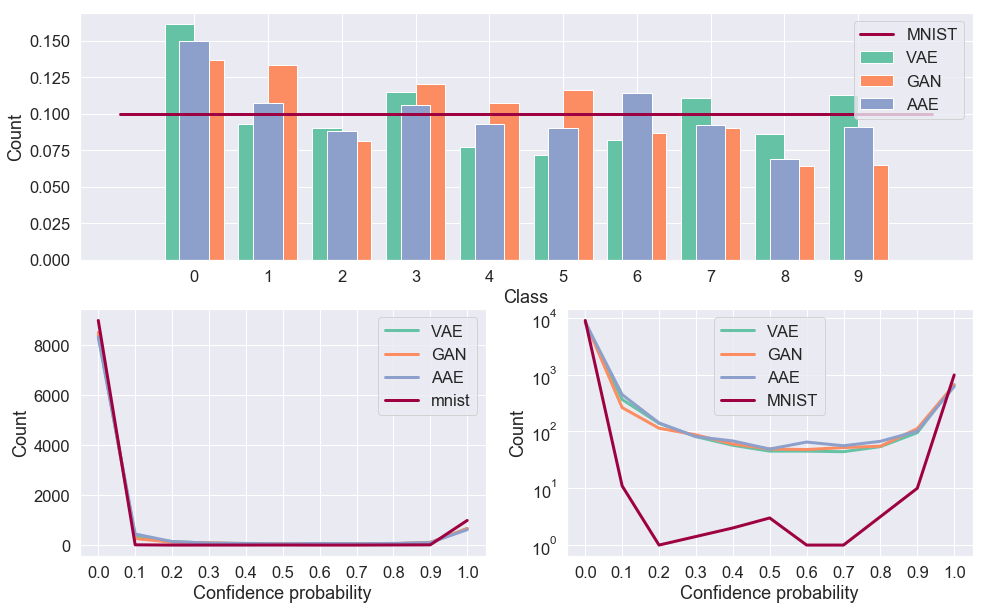

In [90]:
plt.figure(figsize=(16, 10))
ax1 = plt.subplot(211)
ax1.bar(x-0.2, hist_vae[0]/len(prediction_rounded_vae), width=0.4, align='center', label='VAE')
ax1.bar(x+0.2, hist_gan[0]/len(prediction_rounded_gan), width=0.4, align='center', label='GAN')
ax1.bar(x, hist_aae[0]/len(prediction_rounded_aae), width=0.4, align='center', label='AAE')
sns.lineplot(x=[-1, 10], y=[0.1, 0.1], ax=ax1, c=cmap(0), label='MNIST')  # Baseline
plt.legend()
ax1.set_ylabel('Count')
ax1.set_xlabel('Class')
plt.xticks(np.arange(0, 10, step=1))

ax2 = plt.subplot(223)
sns.lineplot(x=unique_vae, y=count_vae, label='VAE', ax=ax2)
sns.lineplot(x=unique_gan, y=count_gan, label='GAN', ax=ax2)
sns.lineplot(x=unique_aae, y=count_aae, label='AAE', ax=ax2)
s =sns.lineplot(x=unique_mnist, y=count_mnist, label='mnist', ax=ax2, c=cmap(0))
#s.semilogy()
s.set_ylabel('Count')
s.set_xlabel('Confidence probability')
plt.xticks(np.arange(0, 1.1, step=0.1))

ax2 = plt.subplot(224)
sns.lineplot(x=unique_vae, y=count_vae, label='VAE', ax=ax2)
sns.lineplot(x=unique_gan, y=count_gan, label='GAN', ax=ax2)
sns.lineplot(x=unique_aae, y=count_aae, label='AAE', ax=ax2)
s =sns.lineplot(x=unique_mnist, y=count_mnist, label='MNIST', ax=ax2, c=cmap(0))
s.semilogy()
s.set_ylabel('Count')
s.set_xlabel('Confidence probability')
plt.xticks(np.arange(0, 1.1, step=0.1))

plt.show()